# TP1 KMEANS

On nous propose de coder l'algorithme des kmeans afin de faire du clustering sur 2 classes puis plus de 2 classes.
Plus tard, on utilisera notre algorithme pour segmenter une image sur l'information de couleur.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial
from skimage import io

In [4]:
clusters = 2
dim = 2
nb = 50
K = clusters
mean = np.random.randint(5, size=clusters)*2
mean = mean.T * np.random.random(size=clusters)
sd = np.random.random(size=clusters)

## Fonctions à utiliser pour le clustering

In [5]:
def gen_points(mean=1,sd=0.5, nb=100, dim=2, clusters=2):
    """ Generates data
    dim: dimension
    nb: number of points
    clusters: number of clusters
    mean: mean
    sd: standard deviation    
    """
    size = []
    # for i in range(0,dim):
    size.append(nb)
    size.append(dim)
    points = np.random.normal(mean[0],sd[0],size=size)
    for i in range(1,clusters):
        points = np.concatenate((points,np.random.normal(mean[i],sd[i],size=size)),axis=0)
    
    return points, mean

In [6]:
def distance(points,Pc):   
    """ Returns spatial distance between two matrix
    """
    return scipy.spatial.distance.cdist(points[:,:], Pc[:,:])

In [7]:
def kmeans(points = [0,0], K = 1):
    """ Create K clusters from points
    """
    # Initialisation K prototypes
    dim = points.shape[1]
    N = points.shape[0]
    iter = 0
    eps = 0.1
    Pc_index = []
    Pc_save = np.zeros([K,dim])
    clusters = []

    for i in range(0,K):
        Pc_index.append(np.random.randint(0,N))
    Pc = points[Pc_index,:]

    while (np.mean(distance(Pc,Pc_save)) > eps and iter < 3):
        iter += 1
        Pc_save = Pc
        # print(Pc)
        # print(points[:,:Pc.shape[0]])
        dist = distance(points=points[:,:Pc.shape[1]],Pc=Pc)
        clust = np.argmin(dist, axis=1)
        clust = np.expand_dims(clust, axis=0)
        points = np.append(points[:,:Pc.shape[1]], clust.T, axis=1)
        # print(points)
        Pc = np.zeros([K,dim])
        index = np.array([])

        for n in range(0,N):
            for k in range(0,K):
                index = np.append(index, (clust==k).sum())
                if points[n,-1] == k:
                    # print(points)
                    # print(Pc)
                    Pc[k,:] = np.add(Pc[k,:], points[n,:-1])

        for k in range(0,K):
            Pc[k,:] = np.divide(Pc[k,:],index[k])

        # print(Pc)
        indice = points[:,-1]
        points = points[:,:-1]
    return Pc, indice, points


In [8]:
colors=['red', 'green','yellow','blue','purple', 'orange']
def visualisation(points, index, Pc=[0,0], K=1):
    """Visualisation function of a dataset and its K clusters
    """
    if(points.shape[1]==2):
        # for k in range(0,K):
        for n in range(0,len(points)):
            plt.plot(points[n,0], points[n,1], 'o', color=colors[int(index[n])])
        plt.plot(Pc[:,0],Pc[:,1],'ko')
        plt.grid(True)
        plt.axis([min(mean)-1,max(mean)+1,min(mean)-1,max(mean)+1])

In [9]:
def img_2_mat(my_img):
    """ Reshaping 3D img NxMx3 to 2D matrix N*Mx3
    """
    mat = my_img.reshape(my_img.shape[0]*my_img.shape[1],my_img.shape[2])
    return mat

In [10]:
def mat_2_img(mat,my_img):
    """ Reshaping 2D matrix N*Mx3 to 3D img NxMx3 
    """
    img_seg = mat.reshape(my_img.shape[0], my_img.shape[1], my_img.shape[2])
    return img_seg

In [11]:
def kmeans_image(path_image, K):
    """ Clustering an image and changing pixels to its closest cluster
    """
    my_img = io.imread(path_image)
    imgplot = plt.imshow(my_img)
    Mat = img_2_mat(my_img)
    
    Pc, index, clusters = kmeans(Mat, K)

    for k in range(Mat.shape[0]):
        Mat[k,:] = np.floor(Pc[index[k],:])

    img_seg = mat_2_img(Mat, my_img)

    io.imsave(path_image.split('.')[0] + "_%d.jpg" % K, img_seg)
    imgplot = plt.imshow(img_seg)
    return Pc, index, img_seg


## Exemple
### Clusterisation 2D
On fait la clusterisation d'un exemple simple avec 2 nuages de points éloignés

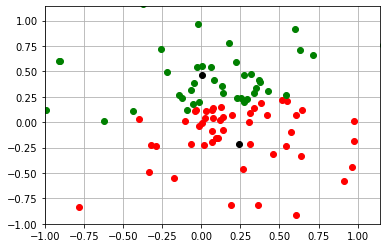

In [12]:
points1, mean1 = gen_points(mean,sd,nb,dim,clusters)
Pc1, index1, clusters1 = kmeans(points1,K=K)
visualisation(clusters1, index1, Pc1, K=K)

Avec un K ne correspondant pas au nombre réel de groupes

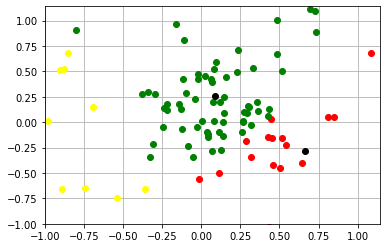

In [13]:
K = clusters+1
points, mean = gen_points(mean,sd,nb,dim,clusters)
Pc, index, clusters_ex = kmeans(points,K=K)
visualisation(clusters_ex, index, Pc, K=K)

Et un exemple un peu plus complexe avec des intensités différentes et relativement proche

In [14]:
clusters = 5
dim = 2
nb = 50
K = clusters
mean = np.random.randint(5, size=clusters)
mean = mean.T * np.random.random(size=clusters)
sd = np.random.random(size=clusters)

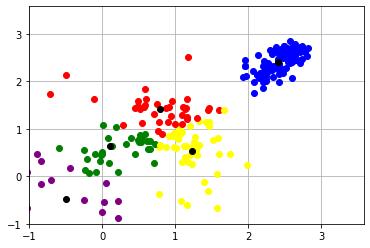

In [15]:
points, mean = gen_points(mean,sd,nb,dim,clusters)
Pc, index, clusters_ex = kmeans(points,K=K)
visualisation(clusters_ex, index, Pc, K=K)

## Exemple de clusterisation sur une image
On souhaite pouvoir changer les pixels vers les le centre du cluster le plus proche.

On observe ainsi pour un nombre différent de clusters :

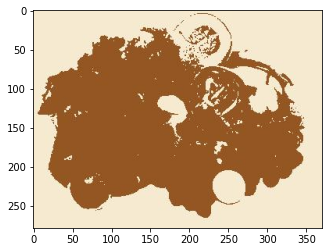

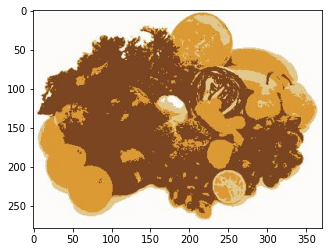

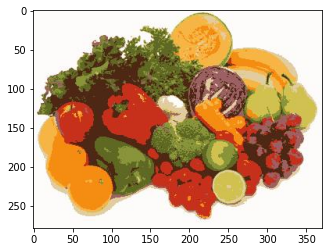

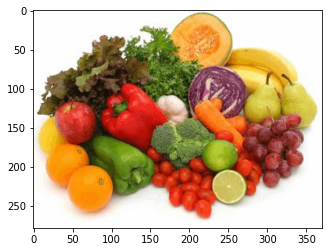

In [17]:
path_image = "images/fruits.jpg"
#for i in range(1,13):
    # Pc, index, img_seg = kmeans_image(path_image=path_image, K=i)
plt.figure()
plt.imshow(io.imread("images/fruits_2.jpg"))
plt.figure()
plt.imshow(io.imread("images/fruits_4.jpg"))
plt.figure()
plt.imshow(io.imread("images/fruits_10.jpg"))
plt.figure()
plt.imshow(io.imread("images/fruits_255_cuda.jpg"))

La clusterisation avec 255 couleurs à été réalisée à l'aide du script `Kmeans_skcuda.py` afin d'accélérer le temps d'exécution. 

Nous avons vu en A4 la puissance de CUDA pour le traitement de données importantes, ce qui est notre cas avec le nombre de pixels de l'image et le nombre d'itérations qui augmentent en fonction du nombre de clusters recherchés. J'ai ainsi décidé - pour voir à partir de combien de niveaux de couleurs peut-on apercevoir une image nette - d'observer le traitement Kmeans jusqu'à 255 clusters.

On observe ainsi qu'au dessus de 40 clusters on arrive à bien distinguer les fruits et légumes présents sur l'image.

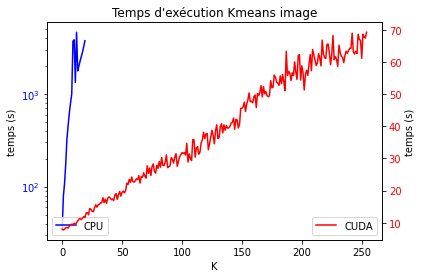

In [ ]:
cpu = []
cuda = []
i = 0
with open("timing.txt",'r') as data_file:
    for line in data_file:
        data = line.split()
        if(len(data) < 4):
            i=i+1
        if(len(data) > 3):
            if(i == 1):
                cpu.append(float(data[2]))
            if(i == 2):
                cuda.append(float(data[2]))

fig, ax1 = plt.subplots()
ax1.set_xlabel("K")
ax1.set_ylabel("temps (s)")
ax1.set_yscale('log')
ax1.plot(cpu,'b')
ax1.tick_params(axis ='y', labelcolor = 'blue') 
plt.legend(['CPU'],loc='lower left')

ax2 = ax1.twinx()
ax2.set_ylabel("temps (s)")
ax2.plot(cuda,'r')
ax2.tick_params(axis ='y', labelcolor = 'red') 

plt.legend(['CUDA'],loc='lower right')
plt.title("Temps d'exécution Kmeans image")
plt.show()
